## Page View Time Series Visualizer

In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
# Clean data
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

Use Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

Text(0, 0.5, 'Page Views')

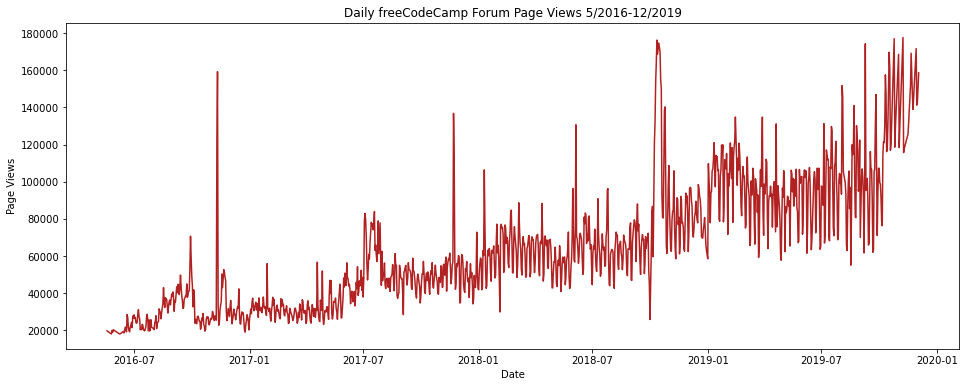

In [8]:
plt.figure(figsize=(16, 6))
plt.plot(df, color='firebrick')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

Draw a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [39]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['Years'] = df_bar.index.year
df_bar['Months'] = df_bar.index.month_name()

In [40]:
# calculate average page views
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = pd.pivot_table(df_bar, values='value', index='Years', columns='Months', aggfunc='mean').reindex(month_order, axis=1)
df_bar

Months,January,February,March,April,May,June,July,August,September,October,November,December
Years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Text(0, 0.5, 'Average Page Views')

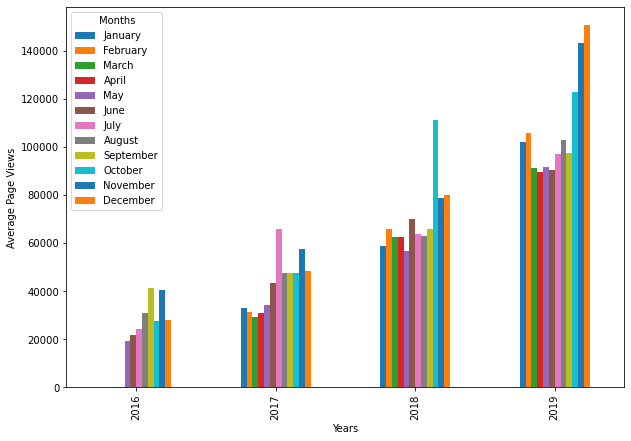

In [41]:
# Draw bar plot
df_bar.plot.bar(figsize=(10, 7))
plt.ylabel('Average Page Views')

Use Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [34]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box['year'] = df_box.index.year
df_box['month'] = df_box.index.strftime('%b')

df_box.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


Text(0, 0.5, 'Page Views')

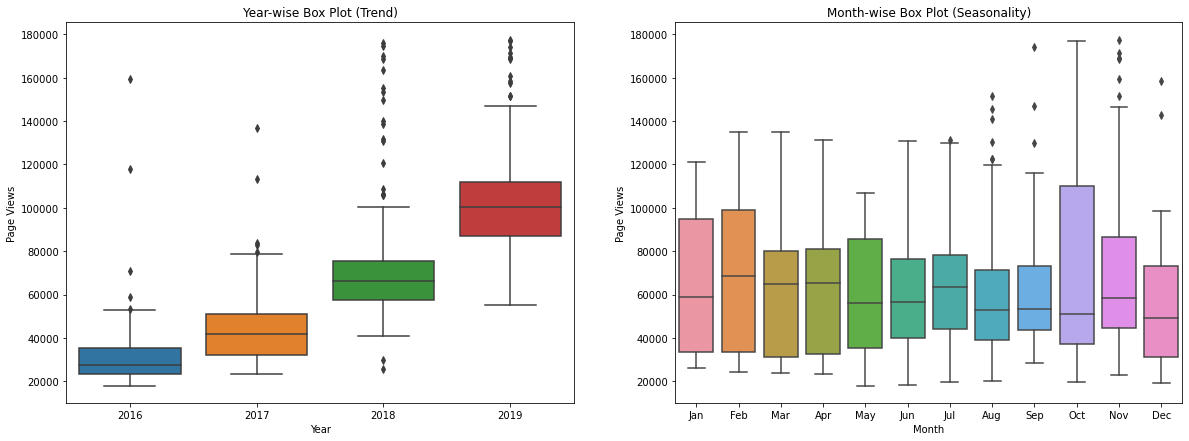

In [43]:
# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.boxplot(data=df_box, x='year', y='value', ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x='month', y='value', ax=axes[1], order=month_order)
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")